<a href="https://colab.research.google.com/github/janorena/modelado-y-simulacion/blob/master/Ejercicio_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Jorge Andrés Noreña García - 816543

## Ejercicio Capítulo 2.3 

In [ ]:
import matplotlib.style
matplotlib.style.use('classic')
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
#Definimos el método de Runge Kutta de cuarto orden

def rk4( func, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):

      x.append (xi)
      t.append (ti)
      k1 = func( ti,xi,params)
      k2 = func( ti + 0.5*h,xi + 0.5*k1*h,params )
      k3 = func( ti + 0.5*h,xi + 0.5*k2*h,params)
      k4 = func( ti + h,xi + k3*h,params) 

      xi = xi + h*(k1 + 2*k2 + 2*k3 + k4)/6
      ti = ti + h
    return t, x


# Definimos el método de Euler 

def euler( func, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):
    
      x.append (xi)
      t.append (ti)
  
      xi = xi + h*func(ti,xi,params)
      ti = ti + h
    return t, x    



#### Ejercicio 2.3.1 (Ecuación Logística): 
\begin{equation}
\dot { N } =rN\left( 1-\frac { N }{ K }  \right) 
\end{equation}


### a) Separar variables e integrarlas usando fracciones parciales.
### b) Haz el cambio de variables x = 1 / N. Luego deriva y resuelve la ecuación diferencial resultante para x.






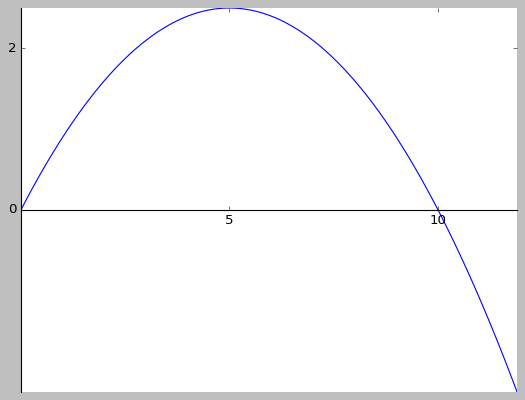

In [ ]:
N = np.arange(0,12,.1)
r,k = 1,10
dN = r*N*(1-N/k)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_xticks([5,10])
ax.set_yticks([0,2])

plt.plot(N,dN)
plt.show()

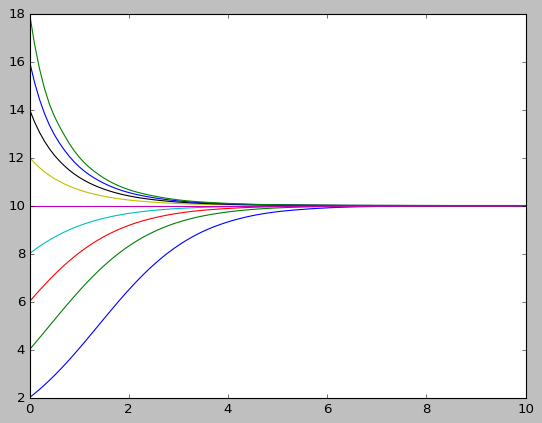

In [ ]:
def dN(t, N, r, k): 
  return  r*N*(1-N/k)

r,k = 1,10
N0 = np.arange(2,20,2)
tspan = [0, 10]
sol = solve_ivp(dN, tspan, N0, args = (r,k),\
                dense_output = True)

t = np.linspace(tspan[0],tspan[1],101)
x = sol.sol(t)
for i in range(N0.size):
  plt.plot(t,x[i])
plt.show()

In [ ]:
  

def sistema3(t, x, a):
    x_dot = 0.02*x*(1-x/a)
    return x_dot



### Ecuación Logística

Ejercicio 2.3.1 
\begin{equation}
\dot { N } =rN\left( 1-\frac { N }{ K }  \right) 
\end{equation}


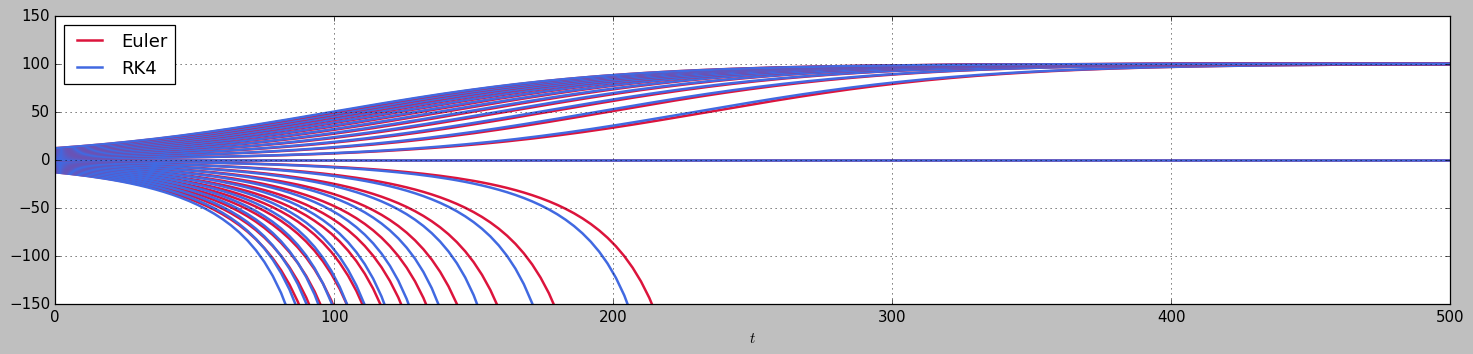

In [ ]:
a = 100
h = 3
ti = 0
tf = 1000
x0 = 0.1

plt.figure(figsize=(20, 4), dpi=90)
for i in range(-13,13,1):
    x0=i
    t1,x1 = euler( sistema3, h, ti, tf, x0, a )
    t2,x2 = rk4( sistema3, h, ti, tf, x0, a )
    if i==0:
      plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)
    else:
      plt.plot( t1, x1, c = 'crimson', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', linewidth = 2)


plt.xlim([0, 500])
plt.ylim([-150, 150])
plt.xlabel(r'$t$')
plt.legend(loc = 'best')
plt.grid()
plt.show()